# CODECADEMY WALKTHROUGH MACHINE LEARNING PORTFOLIO PROJECT: OKCUPID DATE A SCIENTIST

### INTRODUCTION

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we’ve never had before about how different people experience romance.

This portfolio project will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

### SCOPING

Project scoping creates a structure for the entire project. This includes stating the goals for the project, gathering the data, considering the analytical steps required through analysis and evaluation which will help build conclusions and findings from the analysis. A proper project scope can be a great road map for any project. 

#### PROJECT GOALS

The project goal is to utilize the machine learning skills and its techniques to the OKCupid App User Profile dataset. Zodiac symbols are important for many users, but some users don’t add them in. This project will classify Zodiac signs using drinking, smoking, drugs, and essays as the features and will predict a user’s zodiac signs so we can guess the missing zodiacs when we make matches.  

#### DATA

The data is stored in profiles.csv provided by codecademy. The dataset provided has the following columns of multiple-choice data:

- age: continuous variable of users age 
- body_type: categorical variable of body type of user
- diet: categorical variable of dietary information
- drinks: categorical variable of alcohol consumption
- drugs: categorical variable of drug usage
- education: categorical variable of educational attainment
- ethnicity: categorical variable of ethnic backgrounds
- height: continuous variable of height of user
- income: continuous variable of income of user
- job: categorical variable of employment description
- offspring: categorical variable of children status
- orientation: categorical variable of sexual orientation
- pets: categorical variable of pet preferences
- religion: categorical variable of religious background
- sex: categorical variable of gender
- sign: categorical variable of astrological symbol
- smokes: categorical variable of smoking consumption
- speaks: categorical variable of language spoken
- status: categorical variable of relationship status
- last_online: date variable of last login
- location: categorical variable of user locations
  
And a set of open short-answer responses to :

- essay0: My self summary
- essay1: What I’m doing with my life
- essay2: I’m really good at
- essay3: The first thing people usually notice about me
- essay4: Favorite books, movies, show, music, and food
- essay5: The six things I could never do without
- essay6: I spend a lot of time thinking about
- essay7: On a typical Friday night I am
- essay8: The most private thing I am willing to admit
- essay9: You should message me if…

#### ANALYSIS

After the data is received, summary statistics, descriptive statistics like mean, median, range, correlations,Data visualizations for univariate and multivariate exploration and short summary notes explaining insights gained from exploration. Since zodiac signs are being classified to make predictions on missing zodiac signs, machine learning classification algorithms will be implemented to solve the problem of this project.

#### EVALUATION

Once the model is created, metrics of success are used to evaluate the model performance(s). This include the use of confusion matrix and finding the accuracy, precision, recall, f1 of the model(s) used, and create graphs showing how they changed. The main components to include in the machine learning evaluation are:

- Table showing model performance
- Charts showing model performance

##### IMPORT STATEMENTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

##### LOAD THE DATA

In [2]:
profiles = pd.read_csv('profiles.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


##### INSPECT THE DATA

In [3]:
print(profiles.shape)

(59946, 31)


In [15]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [86]:
profiles_cols = profiles.columns

#for col in profiles_cols:
    #print(f"{col}:{profiles[col].unique()}")

In [9]:
print(profiles.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [16]:
profiles.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [13]:
profiles.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [24]:
print('number of zodaic_signs:',profiles['sign'].nunique())
print('zodaic_signs:',profiles['sign'].unique())
print(profiles['sign'].value_counts())

number of zodaic_signs: 48
zodaic_signs: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'sc

From our inspection of the sign column, there are 48, but there should only be 12 signs. Upon closer inspection, there seems to be special characters and text attached with the signs.
These text as well as special characters (eg \&rsquo; for a single quote ') will need to be removed.

In [25]:
print(profiles['age'].unique())
print(profiles['age'].value_counts())

[ 22  35  38  23  29  32  31  24  37  28  30  39  33  26  27  20  25  40
  36  21  34  43  46  41  42  45  18  55  50  59  44  48  54  51  62  52
  19  58  66  53  63  47  49  61  60  57  56  65  64  68 110  69  67 109]
age
26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64


From our age column, we have two users with age 110 years and age 109 years which are outliers to the age column. In real life, its impossible for users of these ages to be on a dating site. Since these outliers are just two in numbers, We will keep them because the two data points should have minimal effect on our ML model.

In [26]:
print(profiles['height'].unique())
print(profiles['height'].value_counts())

[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 91. 83. 77. 58. 56. 95. 57. 87. 81. 36. 43. 52. 55. 53. 93.
  8. 54. 82.  3. 86. 42. 84. 94. 50.  6. 47. 49. 48. 90. 88. nan 37.  9.
 51.  1. 92. 26. 85. 89.  4.]
height
70.0    6074
68.0    5449
67.0    5354
72.0    5315
69.0    5179
71.0    4826
66.0    4759
64.0    3865
65.0    3794
73.0    2815
63.0    2767
74.0    2547
62.0    2244
75.0    1382
61.0    1090
60.0     791
76.0     783
77.0     280
59.0     212
78.0     132
79.0      57
58.0      53
80.0      27
95.0      20
57.0      17
83.0      12
36.0      11
81.0      11
82.0      11
84.0       9
56.0       8
55.0       6
53.0       5
91.0       3
54.0       3
94.0       3
43.0       2
88.0       2
37.0       2
50.0       2
48.0       2
93.0       1
87.0       1
52.0       1
86.0       1
42.0       1
8.0        1
3.0        1
49.0       1
47.0       1
6.0        1
90.0       1
9.0        1
51.0       1
1.0        1
92.0       1
26.0       1
85.

Inspecting outliers for height (eg, 1, 3, 4, 6, 8 or 9 inches) shows there are outliers and this may be as a result of typos. The data can be included since height is not a major indicator to solve the machine learning problem.

In [27]:
print(profiles['income'].unique())
print(profiles['income'].value_counts())

[     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]
income
-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: count, dtype: int64


Its impossible to have income of -1, this could be as a result of typos. So we will replace the -1 income with NaNs, or null values, and use regex to  special characters if any.

##### DATA CLEANING

First to be explored is the number of unique signs. The text as well as special characters (eg \&rsquo; for a single quote '), that will need to be removed.

We will replace the -1 income values with NaNs, or no values, and use regex to remove special characters.

We will also use regex to remove special characters in some other columns. 

In [84]:
# replace special characters
profiles_cols = profiles.columns

for col in profiles_cols:
    profiles_cols.str.replace(r"&amp;", "&", regex=True)
    profiles_cols.str.replace(r"&rsquo;", "'", regex=True)
    # replace html
    profiles_cols.str.replace(r"<[^<>]*>", " ", regex=True)
    profiles_cols.str.replace(r"https?://", " ", regex=True)
    #replace \n
    profiles_cols.str.replace(r"\n", " ", regex=True)
    profiles_cols.str.replace(r"\'", "'", regex=True)
    #check if each special characters is replaced
    #print(f"{col}:{profiles[col].unique()}")

In [43]:
profiles['sign'] = profiles.sign.str.split().str.get(0)
print("Number of Zodaic signs:",profiles.sign.unique())
print("Number of Zodaic signs:",profiles.sign.unique())

Number of Zodaic signs: 12
Number of Zodaic signs: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


In [50]:
#checking few rows of the dataset to see if cleaning has been effected
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me: i would love to think that i was ...,currently working as an international agent fo...,making people laugh. ranting about a good sal...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means. 1. i am...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn't have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn't want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: bagsbrown.blogs...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


#### EXPLORATORY DATA ANALYSIS

#### DATA VISUALIZATION

We are going to get the data visualization for our variables. The continuous variables and the categorical variable. Starting with the continuous variable, we visualize data for the age variable. 

#### Age Distribution

In [59]:
profile_age_sex = profiles.groupby(['age','sex']).size().unstack(fill_value=0)
profile_age_sex

sex,f,m
age,,
18,161,148
19,281,330
20,396,557
21,569,713
22,825,1109
23,1048,1544
24,1246,1996
25,1363,2168
26,1357,2367


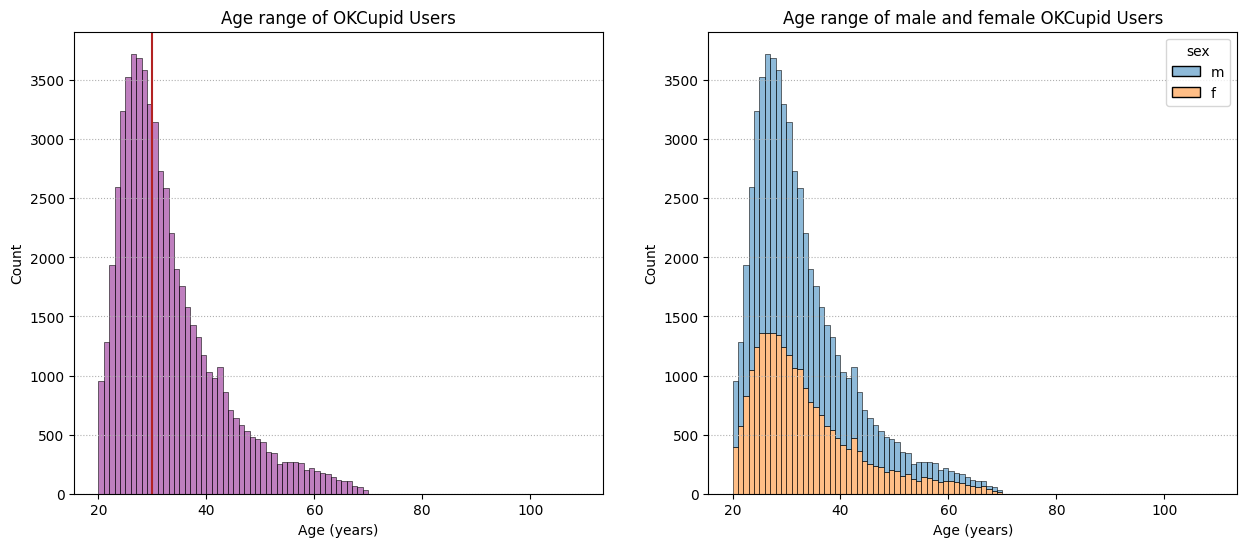

In [79]:
median = profiles.age.median()
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.histplot(data=profiles, x='age', bins=range(20, 110), color='purple', edgecolor='black', alpha=0.5)
plt.title('Age range of OKCupid Users')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.axvline(median, color='firebrick')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.histplot(data=profiles, x='age', hue='sex', bins=range(20, 110), color='blue', edgecolor='black', alpha=0.5, multiple='stack')
plt.title('Age range of male and female OKCupid Users')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')
plt.show()

The most users are in their mid 20s to early 30s and there is a peak around age 25.It looks like there are slightly more females over the age of 55 on the site than males. Age median is 30 and also we can see that the distribution is right skewed, meaning that in our dataset less number of users fall below age 40.

#### Height Distribution

In [80]:
print(profiles.height.unique())
profile_height_sex = profiles.groupby(['height','sex']).size().unstack(fill_value=0)
profile_height_sex

[75. 70. 68. 71. 66. 67. 65. 72. 62. 64. 69. 73. 74. 60. 63. 76. 61. 78.
 79. 59. 80. 91. 83. 77. 58. 56. 95. 57. 87. 81. 36. 43. 52. 55. 53. 93.
  8. 54. 82.  3. 86. 42. 84. 94. 50.  6. 47. 49. 48. 90. 88. nan 37.  9.
 51.  1. 92. 26. 85. 89.  4.]


sex,f,m
height,,
1.0,0,1
3.0,0,1
4.0,1,0
6.0,1,0
8.0,1,0
9.0,0,1
26.0,0,1
36.0,2,9
37.0,1,1


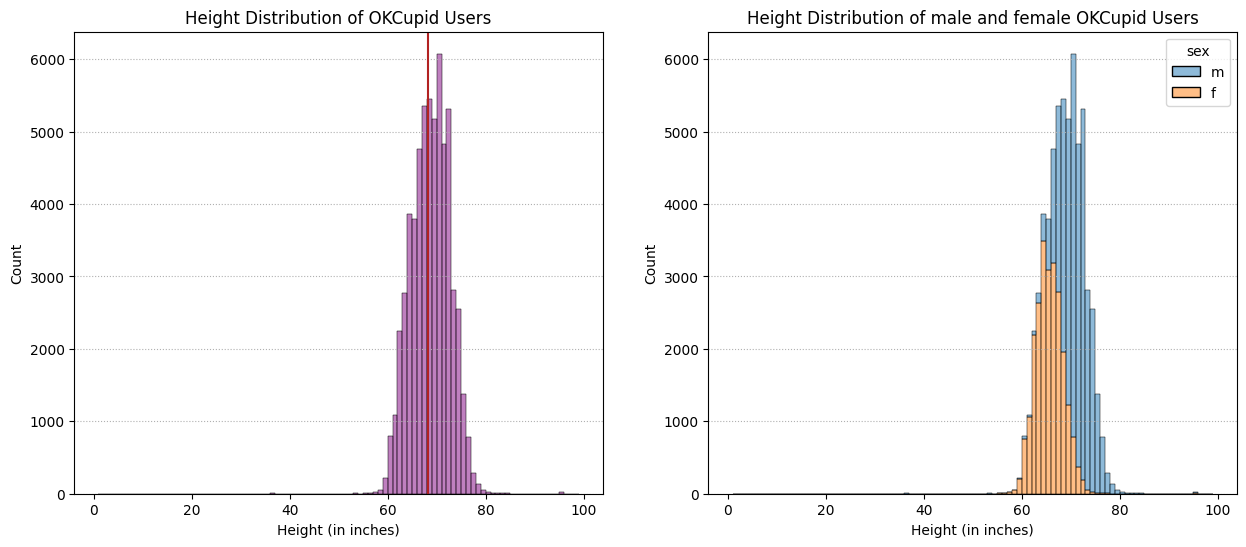

68.29528051649066


In [81]:
#chart for height distribution
Average_height = profiles.height.mean()
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.histplot(data=profiles, x='height', bins=range(1, 100), color='purple', edgecolor='black', alpha=0.5)
plt.title('Height Distribution of OKCupid Users')
plt.xlabel('Height (in inches)')
plt.ylabel('Count')
plt.axvline(Average_height, color='firebrick')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.histplot(data=profiles, x='height', hue='sex', bins=range(1, 100), color='blue', edgecolor='black', alpha=0.5, multiple='stack')
plt.title('Height Distribution of male and female OKCupid Users')
plt.xlabel('Height (in inches)')
plt.ylabel('Count')
plt.grid(axis='y', linestyle=':')
plt.show()

print(Average_height)

The average height is 68 inches, The most frequent height of all users is about 70 inches. Most men are 70 inches, while most women are 64 inches. Its obvious that females tend to be shorter than males and the charts appears as a normal distribution.

#### Income Distribution

In [83]:
print(profiles.income.unique())
profile_income_sex = profiles.groupby(['income','sex']).size().unstack(fill_value=0)
profile_income_sex

[     -1   80000   20000   40000   30000   50000   60000 1000000  150000
  100000  500000   70000  250000]


sex,f,m
income,,
-1,21004,27438
20000,1031,1921
30000,320,728
40000,339,666
50000,311,664
60000,221,515
70000,166,541
80000,261,850
100000,256,1365


In [ ]:
#chart for Income distribution
Average_income = profiles.income.mean()
fig = plt.subplots(1,2, figsize=(15,6))
plt.subplot(1, 2, 1)
sns.histplot(data=profiles, x='income', bins=range(20000, 1000000), color='purple', edgecolor='black', alpha=0.5)
plt.title('Income Distribution of OKCupid Users')
plt.xlabel('Income')
plt.ylabel('Count')
plt.axvline(Average_income, color='firebrick')
plt.grid(axis='y', linestyle=':')

plt.subplot(1, 2, 2)
sns.histplot(data=profiles, x='income', hue='sex', bins=range(20000, 1000000), color='blue', edgecolor='black', alpha=0.5, multiple='stack')
plt.title('Income Distribution of male and female OKCupid Users')
plt.xlabel('Income')
plt.ylabel('Count')
plt.axvline(Average_income, color='firebrick')
plt.grid(axis='y', linestyle=':')
plt.show()

print(Average_income)